**Họ và Tên: Đào Thanh Thiện**

**MSSV: 1712782**

## Dữ liệu

### Thông tin về dữ liệu:

Dữ liệu được tổng hợp bởi các tác giả:

    1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

    2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

    3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

    4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Dữ liệu được lấy [tại đây](https://www.kaggle.com/ronitf/heart-disease-uci)

## Khám phá dữ liệu

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Đọc dữ liệu từ file CSV và lưu vào dataframe

In [2]:
#Đọc dữ liệu
data = pd.read_csv("heart.csv")
df = data.copy()
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Thuộc tính dữ liệu

In [3]:
num_rows, num_cols = df.shape
print("Dữ liệu có {} dòng, {} cột.".format(num_rows, num_cols))

Dữ liệu có 303 dòng, 14 cột.


## **age** : độ tuổi của người bệnh

**sex** : giới tính (1 = male; 0 = female)

**cp** : loại đau ngực (4 values)

**trestbps** : huyết áp lúc nghỉ (tính bằng mm Hg khi nhập viện)

**chol** : cholesterol huyết thanh tính bằng mg / dl

**fbs** : đường huyết lúc đói & gt; 120 mg / dl

**restecg** : kết quả điện tâm đồ nghỉ ngơi

**thalach** : nhịp tim tối đa đạt được

**exang** : tập thể dục gây ra đau thắt ngực

**oldpeak** = ST trầm cảm do tập thể dục so với nghỉ ngơi

**slope** : độ dốc của đoạn ST bài tập đỉnh

**ca** : số lượng các mạch máu chính (0-3) được tô màu bởi Flourrosopy

**thal** : 3 = normal; 6 = fixed defect; 7 = reversable defect

**target** :

## Tiền xữ lí

In [4]:
#Đổi giá trị của cột giới tính
df['sex'] = df['sex'].replace(1, 'Male')
df['sex'] = df['sex'].replace(0, 'Female')

#Đổi giá trị của cột thal
df['thal'] = df['thal'].replace(1, 'fixed defect')
df['thal'] = df['thal'].replace(2, 'normal')
df['thal'] = df['thal'].replace(3, 'reversable defect')

#Đổi giá trị của cột cp
df['cp'] = df['cp'].replace(0, 'asymptomatic')
df['cp'] = df['cp'].replace(1, 'atypical angina')
df['cp'] = df['cp'].replace(2, 'non-anginal pain')
df['cp'] = df['cp'].replace(3, 'typical angina')

#Đổi giá trị của cột restecg
df['restecg'] = df['restecg'].replace(0, 'ventricular hypertrophy')
df['restecg'] = df['restecg'].replace(1, 'normal')
df['restecg'] = df['restecg'].replace(2, 'ST-T wave abnormality')

#Đổi giá trị của cột slope
df['slope'] = df['slope'].replace(0, 'downsloping')
df['slope'] = df['slope'].replace(1, 'flat')
df['slope'] = df['slope'].replace(2, 'upsloping')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145,233,1,ventricular hypertrophy,150,0,2.3,downsloping,0,fixed defect,1
1,37,Male,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,Female,atypical angina,130,204,0,ventricular hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,Male,atypical angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,Female,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,asymptomatic,140,241,0,normal,123,1,0.2,flat,0,reversable defect,0
299,45,Male,typical angina,110,264,0,normal,132,0,1.2,flat,0,reversable defect,0
300,68,Male,asymptomatic,144,193,1,normal,141,0,3.4,flat,2,reversable defect,0
301,57,Male,asymptomatic,130,131,0,normal,115,1,1.2,flat,1,reversable defect,0


## Tiền xữ lý:

#### - Kiểm tra tính đầy đủ của dữ liệu

In [6]:
if df.isnull().values.any() == True:
    print("Dữ liệu thiếu")
else:
    print("Không có ô có dữ liệu bị thiếu")

Không có ô có dữ liệu bị thiếu


#### - Kiểm tra xem dữ liệu có bị trùng lắp, loại bỏ nếu có

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145,233,1,ventricular hypertrophy,150,0,2.3,downsloping,0,fixed defect,1
1,37,Male,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,Female,atypical angina,130,204,0,ventricular hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,Male,atypical angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,Female,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,asymptomatic,140,241,0,normal,123,1,0.2,flat,0,reversable defect,0
299,45,Male,typical angina,110,264,0,normal,132,0,1.2,flat,0,reversable defect,0
300,68,Male,asymptomatic,144,193,1,normal,141,0,3.4,flat,2,reversable defect,0
301,57,Male,asymptomatic,130,131,0,normal,115,1,1.2,flat,1,reversable defect,0


## Đặt câu hỏi

## Phân tích dữ liệu

Text(0.5, 1.0, 'status_rocket According to status')

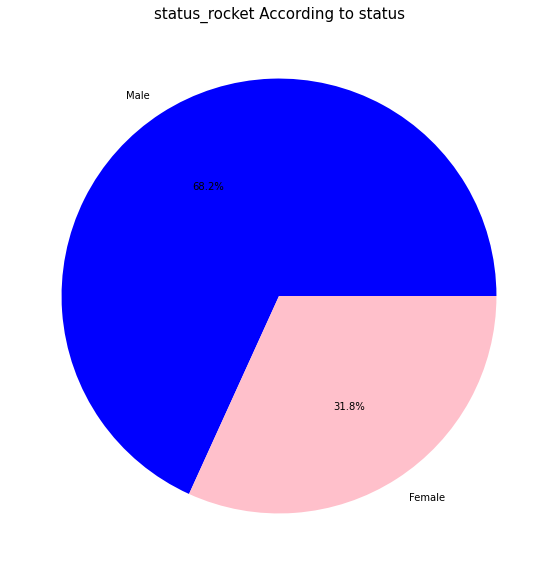

In [12]:
# Sex distribution 
labels = df['sex'].value_counts().index
colors = ['blue','pink']
sizes = df['sex'].value_counts().values

# visual cp
plt.figure(0,figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('status_rocket According to status',fontsize = 15)

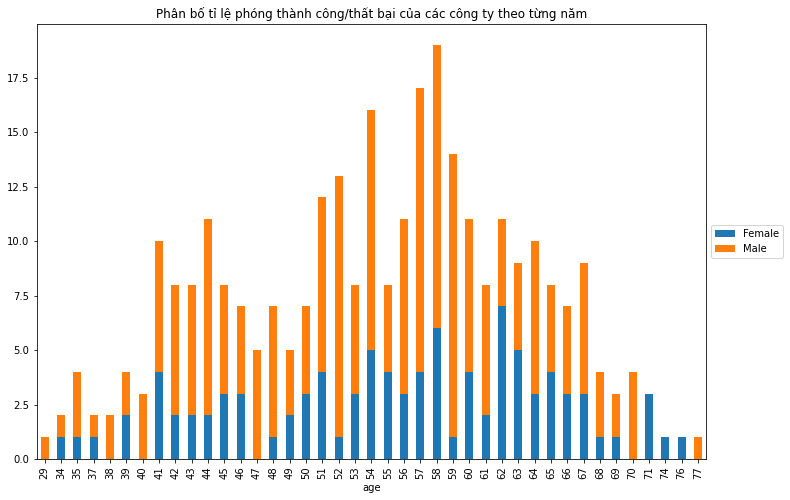

In [13]:
df2 = df.groupby(['age','sex'])['age'].count().unstack('sex').fillna(0)
df2[df2.columns].plot(title='Phân bố tỉ lệ phóng thành công/thất bại của các công ty theo từng năm',
                      kind='bar', stacked=True,figsize=(12,8)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Text(0.5, 1.0, 'status_rocket According to status')

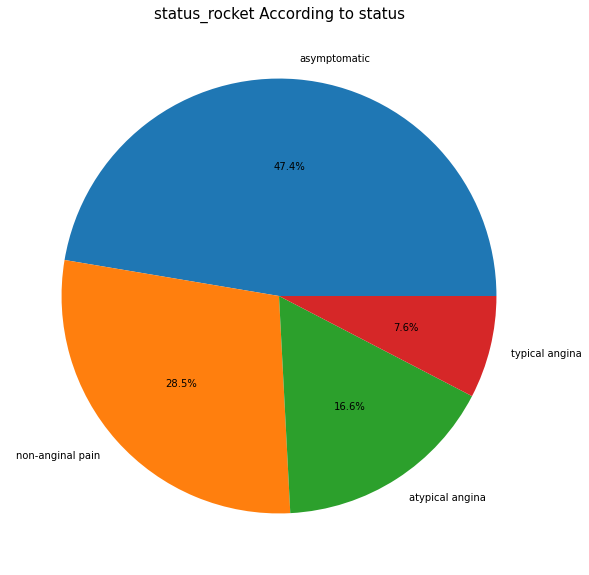

In [16]:
labels = df['cp'].value_counts().index
sizes = df['cp'].value_counts().values

# visual cp
plt.figure(0,figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('status_rocket According to status',fontsize = 15)

Text(0.5, 1.0, 'status_rocket According to status')

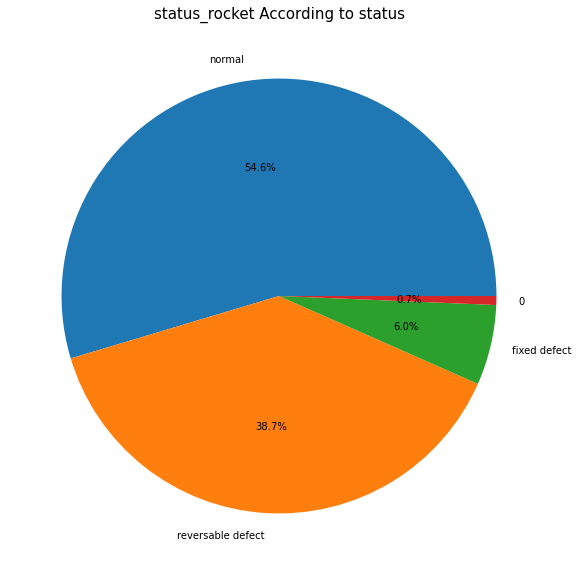

In [17]:
labels = df['thal'].value_counts().index
sizes = df['thal'].value_counts().values

# visual cp
plt.figure(0,figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('status_rocket According to status',fontsize = 15)